In [27]:
from fastai.vision.all import *
from fastdownload import download_url
from pathlib import Path
from collections import Counter
import requests

In [28]:
import sys
print(sys.executable)

d:\miniforge\envs\ml-nlp\python.exe


In [29]:
path = Path(r"C:\nlp-ml-journey\bird_or_not")
path.mkdir(parents=True, exist_ok=True)
urls = {
    "bird": [
        "https://upload.wikimedia.org/wikipedia/commons/3/32/House_sparrow04.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/4/45/Ploceus_velatus_beak_open.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/9/97/Swallow-tailed_bee-eater_%28Merops_hirundineus_chrysolaimus%29.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/9/94/Melanerpes-erythrocephalus-003.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/6/6d/Grey-breasted_mountain_toucan_%28Andigena_hypoglauca%29_Caldas.jpg"
    ],
    "forest": [
        "https://upload.wikimedia.org/wikipedia/commons/5/56/Wooden_staircase_steps_in_the_forest_of_Hallasan_Park_Eorimok_Trail_at_dusk_on_Jeju_Island_in_South_Korea.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/b/bb/Wandelen_over_de_Planken_Wambuis_vanuit_Mossel_069_A.jpg",
        "https://images.pexels.com/photos/34950/pexels-photo.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/3/36/D%C3%BClmen%2C_G%C3%B6versheide_--_2015_--_7718-22.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/b/be/Hutan_Tangkahan.jpg"
    ]
}
for label, url_list in urls.items():
    dest_folder = path / label
    dest_folder.mkdir(parents=True, exist_ok=True)
    for i, url in enumerate(url_list):
        dest = dest_folder / f"{label}_{i}.jpg"
        if not dest.exists():
            download_url(url, dest, show_progress=False)


In [30]:
# Taining the model 
files = get_image_files(path)
failed = verify_images(files)
failed.map(Path.unlink)
print("Removed corrupt files:", len(failed))

Removed corrupt files: 0


In [31]:
files = get_image_files(path)  # refresh after deletion
print("Total images:", len(files))
print("Labels:", sorted({f.parent.name for f in files}))
print("Count per label:", Counter([f.parent.name for f in files]))

Total images: 10
Labels: ['bird', 'forest']
Count per label: Counter({'bird': 5, 'forest': 5})


In [ ]:
# To train a model - requries DataLoaders(ie.. training set) in this case the images are the used to create a model and a validation set to check the accuracy of the model
valid_pct = 0.2
bs = 32

dblock = DataBlock(
    # inputs to our model are images, and the outputs are categories i.e bird or forest
    blocks=(ImageBlock, CategoryBlock), # type: ignore
    # finds all the inputs to our model, which returns a list of all image files in a path
    get_items=get_image_files,
    # split the data into training and calidation sets randomly, using 20% of the data for the validation set
    splitter=RandomSplitter(valid_pct, seed=42),
    # y vales is the name of the parent of each file
    get_y=parent_label,
    # Before training, resize each image to 192x192 pixels by "squishing" it
    item_tfms=[Resize(192, method='squish')]
)

In [33]:
dls = dblock.dataloaders(
    path,
    bs=bs,
    drop_last=False,
    num_workers=0
)

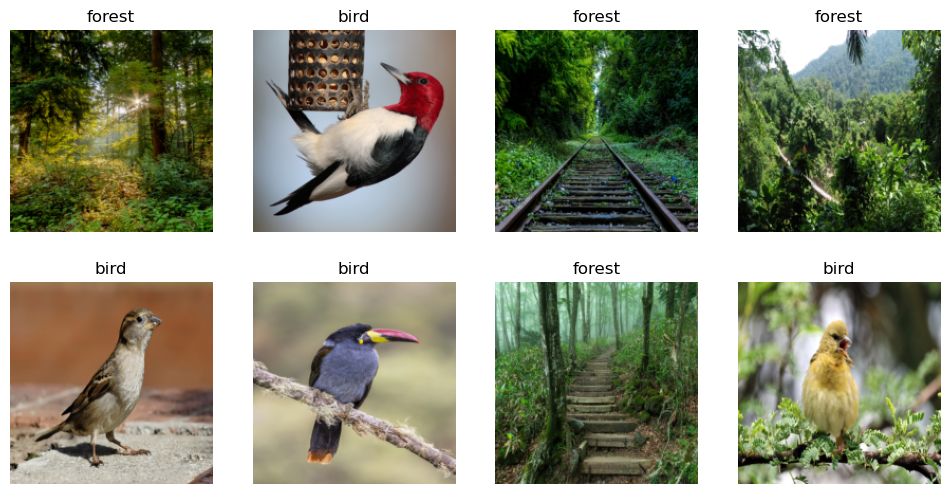

In [35]:
dls.show_batch(max_n=10) 

In [38]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Antonio Alvarez/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 71.5MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.708165,2.737795,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,2.357114,2.382344,0.500000,00:01
1,1.598735,2.180336,0.500000,00:01
2,1.065578,1.866425,0.500000,00:01
